<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=8>
Introduction to Machine Learning <br>
<font color=696880 size=5>
<!-- <br> -->
Computer Engineering Department
<br>
Sharif University of Technology

<font color=696880 size=5>
<br>
CE 40477 - Fall 2024

<font color=GREEN size=5>
<br>
Mahan Bayhaghi & Arshia Gharooni
<!-- <br> -->

____



# Regression

## Linear Regression

### Generate Synthetic Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data(n=50, noise=10.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

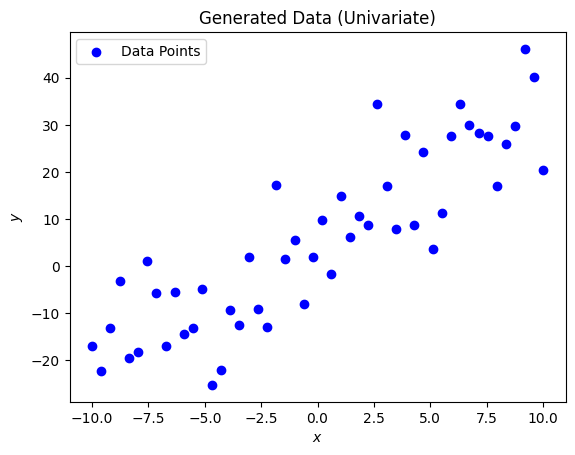

In [3]:
X, y = generate_data(n=50, noise=10.0)
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

### Implement the Closed-Form Solution

In [4]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x

# Linear Regression using closed-form solution
def linear_regression_closed_form(X, y):
    # Adding bias term (x_0 = 1) to input vector X
    X_b = np.c_[np.ones((len(X), 1)), X]  # X_b is now the full input vector with bias term
    # Closed-form solution: w = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w

# Get parameter vector w
w = linear_regression_closed_form(X, y)
print(f"Parameters (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")


Parameters (w): 
w_1 = 2.71, w_0 = 5.75


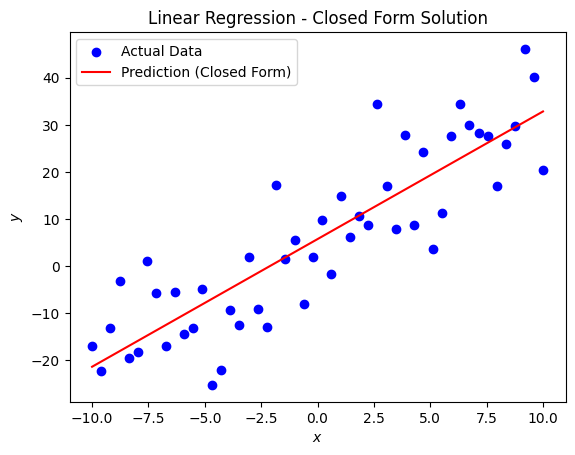

In [5]:
y_pred = h_w(X, w)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction (Closed Form)')
plt.title("Linear Regression - Closed Form Solution")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Polynomial Regression
Linear regression can be extended to model nonlinear relationships by introducing polynomial terms.


### Engineering Polynomial Features

In [6]:
# Function to generate polynomial features (input matrix X')
def polynomial_features(X, degree):
    X_poly = np.c_[np.ones(len(X))]
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, X**i]
    return X_poly

### Implement Polynomial Regression

In [7]:
def polynomial_regression(X, y, degree):
    X_poly = polynomial_features(X, degree)
    # Closed-form solution: w = (X'^T * X')^-1 * X'^T * y
    w = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return w

m = 5  # Degree of the polynomial regression
w_poly = polynomial_regression(X, y, m)  # Parameter vector w

print(f"Parameters (w) for Degree {m}: {w_poly}")


Parameters (w) for Degree 5: [ 3.76225623e+00  4.11915524e+00  6.56217891e-02 -4.30987468e-02
 -1.35616512e-04  2.76350988e-04]


### Visualize the Polynomial Fit

In [8]:
X_fit = np.linspace(X.min(), X.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_poly)  # h_w(x) = X' * w

# Plot the actual data and the polynomial fit
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='green', label=f'Polynomial Fit (Degree {m})')
plt.title(f"Polynomial Regression (Degree {m})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()


## Visualizing 𝐸_𝑟𝑚𝑠
The Root Mean Square Error (RMSE) helps us understand how well our model fits the data.

In [9]:
def compute_rms_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

### Plot RMSE vs Polynomial Degree

Degree 0: Train RMSE = 18.19, Test RMSE = 19.15


Degree 1: Train RMSE = 9.16, Test RMSE = 8.97


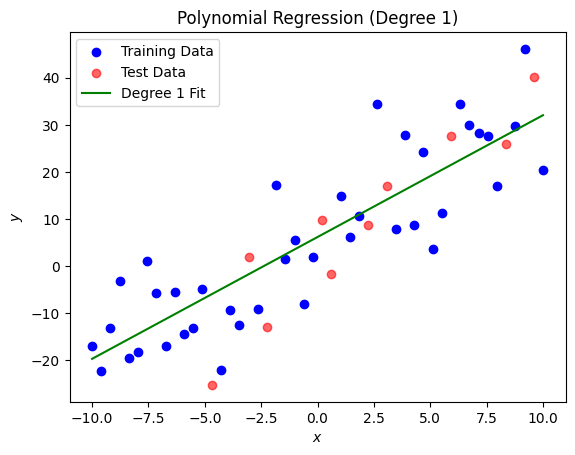

Degree 2: Train RMSE = 9.10, Test RMSE = 8.48


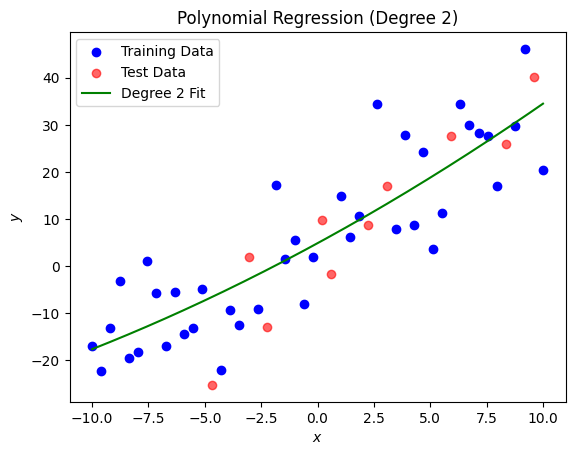

Degree 3: Train RMSE = 8.94, Test RMSE = 8.23


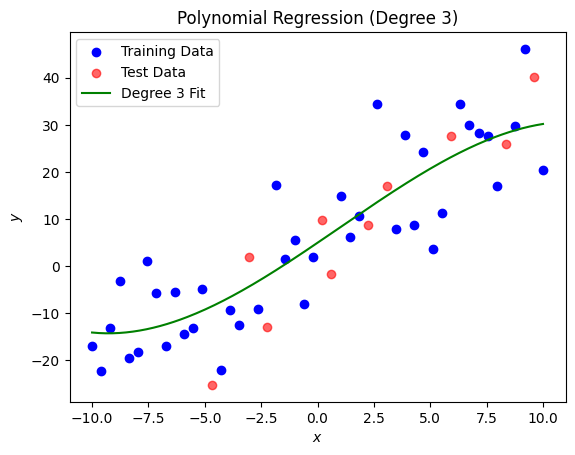

Degree 4: Train RMSE = 8.93, Test RMSE = 8.28


Degree 5: Train RMSE = 8.89, Test RMSE = 8.06


Degree 6: Train RMSE = 8.52, Test RMSE = 8.30


Degree 7: Train RMSE = 8.40, Test RMSE = 8.78


Degree 8: Train RMSE = 8.39, Test RMSE = 8.77


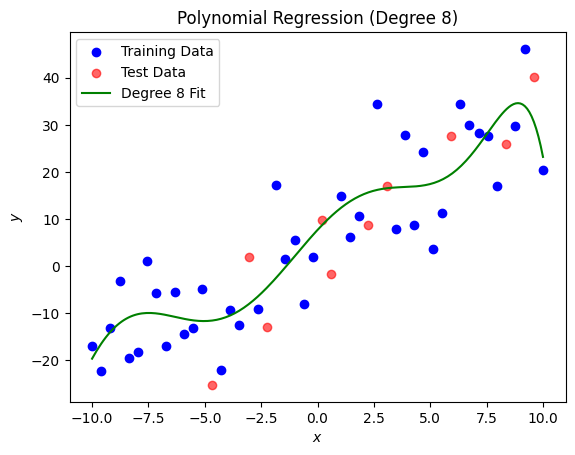

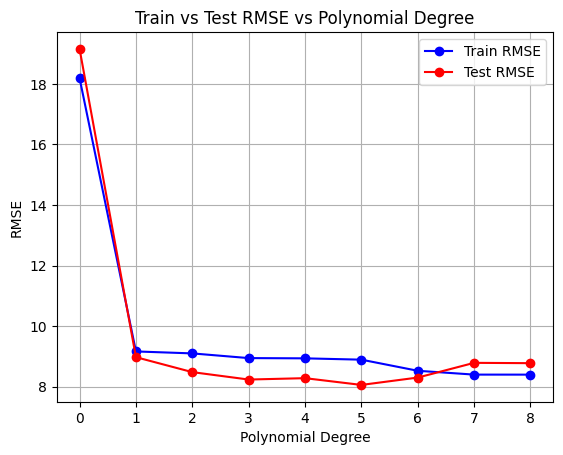

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(0, 9)
train_rms_errors = []
test_rms_errors = []


for d in degrees:
    # Train the model on the training set
    w_poly = polynomial_regression(X_train, y_train, d)

    # Compute predictions for the training set
    X_train_poly = polynomial_features(X_train, d)
    y_train_pred = X_train_poly.dot(w_poly)

    # Compute predictions for the test set
    X_test_poly = polynomial_features(X_test, d)
    y_test_pred = X_test_poly.dot(w_poly)

    # Calculate RMSE for both training and test sets
    train_rms_error = compute_rms_error(y_train, y_train_pred)
    test_rms_error = compute_rms_error(y_test, y_test_pred)

    # Store the errors
    train_rms_errors.append(train_rms_error)
    test_rms_errors.append(test_rms_error)

    # Print the RMSE for the current degree
    print(f"Degree {d}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}")

    # Plot the polynomial fit on the training data
    plt.scatter(X_train, y_train, color='blue', label="Training Data")
    plt.scatter(X_test, y_test, color='red', label="Test Data", alpha=0.6)
    X_fit = np.linspace(X.min(), X.max(), 200)
    X_fit_poly = polynomial_features(X_fit, d)
    y_fit_pred = X_fit_poly.dot(w_poly)
    plt.plot(X_fit, y_fit_pred, label=f"Degree {d} Fit", color='green')
    plt.title(f"Polynomial Regression (Degree {d})")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.show()

# Plot RMSE for training and test sets
plt.plot(degrees, train_rms_errors, marker='o', linestyle='-', color='blue', label='Train RMSE')
plt.plot(degrees, test_rms_errors, marker='o', linestyle='-', color='red', label='Test RMSE')
plt.title("Train vs Test RMSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()

## Regularization: Ridge and Lasso Regression


### Implementing Ridge and Lasso Regression
We'll use scikit-learn for these implementations.

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

degree = 15
X_reshape = X.reshape(-1, 1)

model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_poly.fit(X_reshape, y)

model_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
model_ridge.fit(X_reshape, y)

model_lasso = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1, max_iter=10000))
model_lasso.fit(X_reshape, y)

X_plot = np.linspace(X.min(), X.max(), 200)[:, np.newaxis]

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)

# plt.plot(X_plot, model_poly.predict(X_plot), label='Polynomial Regression', color='red', linewidth=2)
plt.plot(X_plot, model_ridge.predict(X_plot), label='Ridge Regression', color='green', linewidth=2)
plt.plot(X_plot, model_lasso.predict(X_plot), label='Lasso Regression', color='purple', linewidth=2)

plt.title(f"Regularization Comparison (Degree {degree})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.55958e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.645e+03, tolerance: 1.687e+00
  model = cd_fast.enet_coordinate_descent(


# Gradient Descent Optimization


## Implementing Gradient Descent on a Convex Function


### Define a Convex Cost Function

In [12]:
def J_convex(w):
    return w[0]**2 + 2 * w[1]**2

def grad_J_convex(w):
    return np.array([2 * w[0], 4 * w[1]])

### Implement Gradient Descent

In [13]:
def gradient_descent(grad, w_init, learning_rate=0.1, n_steps=20):
    w = np.array(w_init)
    path = [w.copy()]

    for step in range(n_steps):
        grad_w = grad(w)
        w = w - learning_rate * grad_w
        path.append(w.copy())

    return np.array(path)

### Visualize the Gradient Descent Path

In [14]:
w_init = [4, 4]
path_convex = gradient_descent(grad_J_convex, w_init, learning_rate=0.1, n_steps=50)

w1_vals = np.linspace(-5, 5, 400)
w2_vals = np.linspace(-5, 5, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
J_vals = J_convex([W1, W2])

plt.figure(figsize=(8, 6))
contour_levels = np.logspace(-0.5, 3, 35)
plt.contour(W1, W2, J_vals, levels=contour_levels, cmap="jet")
path_x, path_y = path_convex[:, 0], path_convex[:, 1]
plt.plot(path_x, path_y, marker='o', color='red', label='Gradient Descent Path')
plt.title("Gradient Descent on a Convex Function")
plt.xlabel("w1")
plt.ylabel("w2")
plt.legend()
plt.show()

## Implementing Gradient Descent on a Non-Convex Function



### Implementing the Himmelblau's Function

In [15]:
def J_nonconvex(w):
    x, y = w
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def grad_J_nonconvex(w):
    x, y = w
    df_dx = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    df_dy = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([df_dx, df_dy])

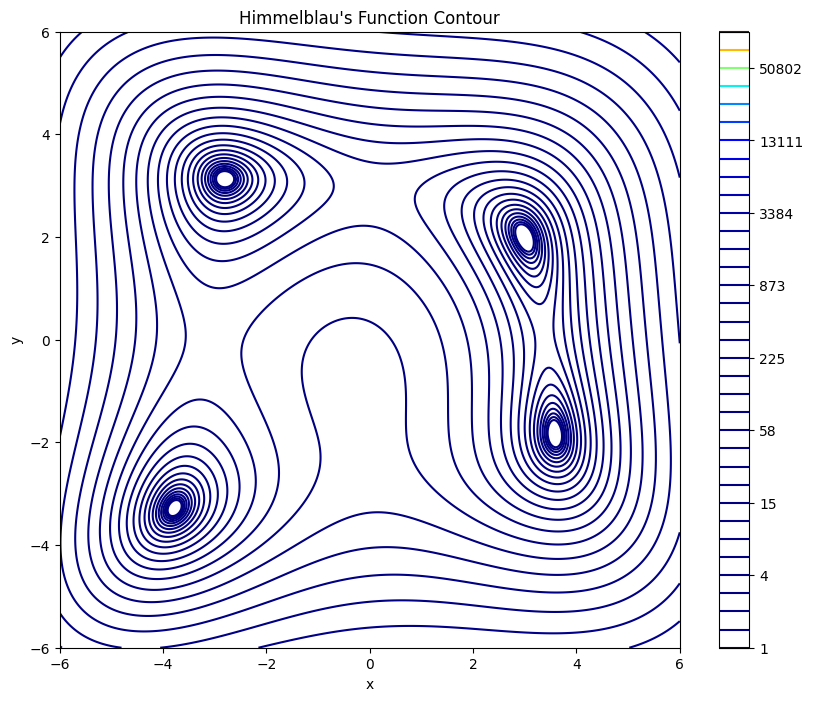

In [16]:
x_vals = np.linspace(-6, 6, 400)
y_vals = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = J_nonconvex([X, Y])

plt.figure(figsize=(10, 8))
contour_levels = np.logspace(0, 5, 35)
plt.contour(X, Y, Z, levels=contour_levels, cmap='jet')
plt.title("Himmelblau's Function Contour")
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

In [17]:
def gradient_descent(grad, w_init, learning_rate=0.01, n_steps=10000, tolerance=1e-6):
    w = np.array(w_init, dtype=float)
    path = [w.copy()]

    for step in range(n_steps):
        grad_w = grad(w)
        grad_norm = np.linalg.norm(grad_w)
        if grad_norm < tolerance:
            print(f"Converged in {step} steps.")
            break
        w = w - learning_rate * grad_w
        path.append(w.copy())

    return np.array(path)

In [18]:
starting_points = [
    [0.0, 0.0],
    [-4.0, 4.0],
    [4.0, 4.0],
    [-5.0, -5.0]
]

paths = []
for idx, w_init in enumerate(starting_points):
    print(f"\nStarting Point {idx+1}: {w_init}")
    path = gradient_descent(grad_J_nonconvex, w_init, learning_rate=0.001, n_steps=10000)
    paths.append(path)


Starting Point 1: [0.0, 0.0]
Converged in 672 steps.

Starting Point 2: [-4.0, 4.0]
Converged in 264 steps.

Starting Point 3: [4.0, 4.0]
Converged in 634 steps.

Starting Point 4: [-5.0, -5.0]
Converged in 248 steps.


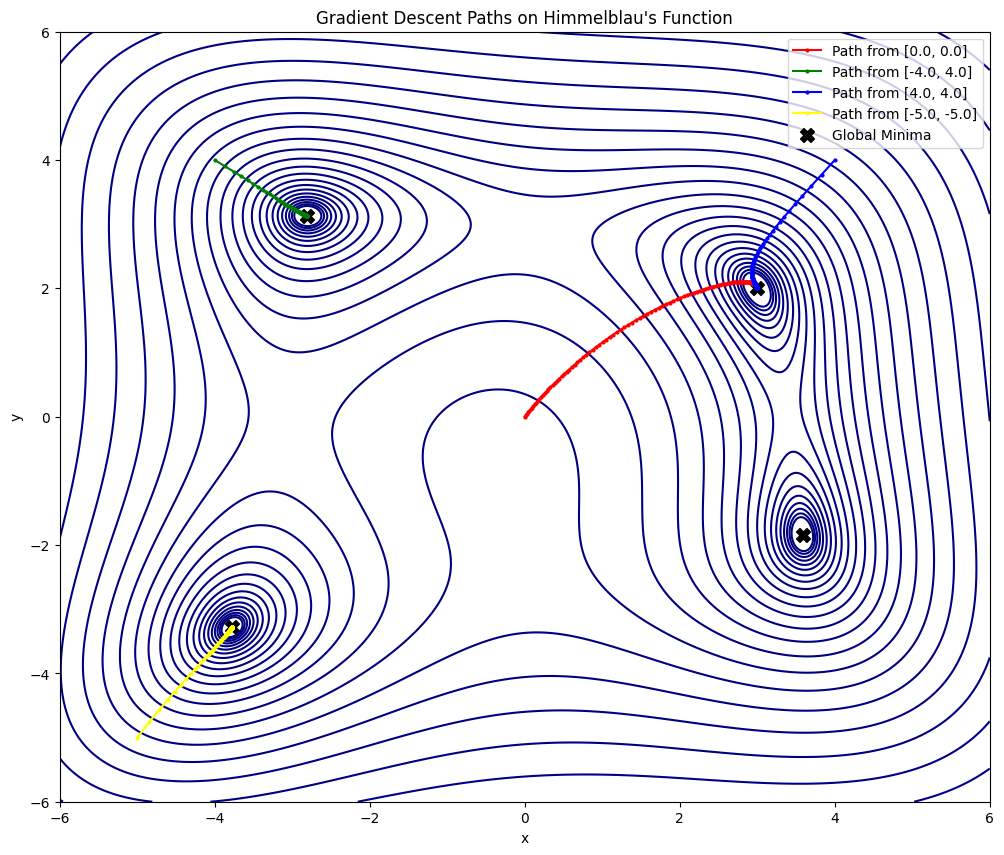

In [19]:
plt.figure(figsize=(12, 10))
plt.contour(X, Y, Z, levels=contour_levels, cmap='jet')
colors = ['red', 'green', 'blue', 'yellow']
labels = [f'Path from {p}' for p in starting_points]

for idx, path in enumerate(paths):
    path_x, path_y = path[:, 0], path[:, 1]
    plt.plot(path_x, path_y, marker='o', markersize=2, color=colors[idx], label=labels[idx])

minima = np.array([
    [3.0, 2.0],
    [-2.805118, 3.131312],
    [-3.779310, -3.283186],
    [3.584428, -1.848126]
])
plt.scatter(minima[:, 0], minima[:, 1], color='black', s=100, marker='X', label='Global Minima')

plt.title("Gradient Descent Paths on Himmelblau's Function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [20]:
learning_rates = [0.0001, 0.001, 0.01]
w_init = [0.5, -0.5]
paths_lr = []

for lr in learning_rates:
    print(f"\nLearning Rate: {lr}")
    path = gradient_descent(grad_J_nonconvex, w_init, learning_rate=lr, n_steps=10000)
    paths_lr.append((lr, path))


Learning Rate: 0.0001
Converged in 8713 steps.

Learning Rate: 0.001
Converged in 873 steps.

Learning Rate: 0.01
Converged in 100 steps.


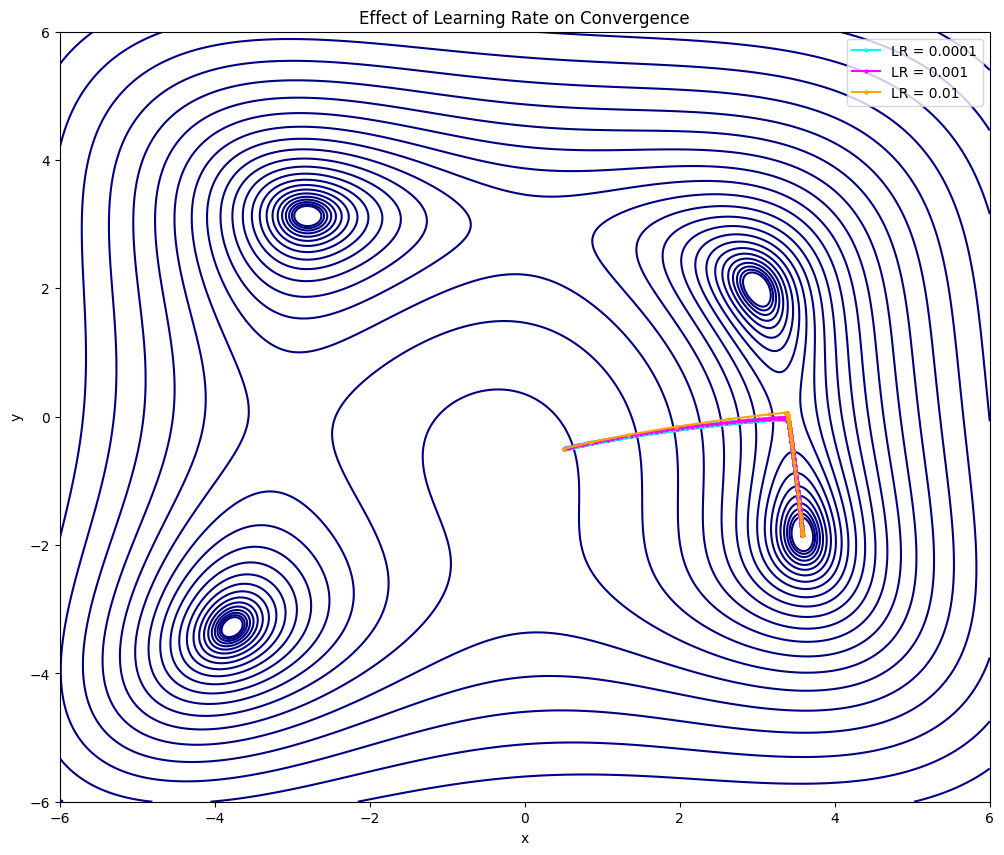

In [21]:
plt.figure(figsize=(12, 10))
plt.contour(X, Y, Z, levels=contour_levels, cmap='jet')
colors = ['cyan', 'magenta', 'orange']
labels = [f'LR = {lr}' for lr, _ in paths_lr]

for idx, (lr, path) in enumerate(paths_lr):
    path_x, path_y = path[:, 0], path[:, 1]
    plt.plot(path_x, path_y, marker='o', markersize=2, color=colors[idx], label=labels[idx])

plt.title("Effect of Learning Rate on Convergence")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Real-World Example 1: California House Price Prediction


## Dataset
We'll use the California Housing Dataset available in scikit-learn.

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X, y = housing.data, housing.target

feature_names = housing.feature_names
print("Feature names:", feature_names)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Data Preprocessing

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Implement Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 0.75


## Feature Importance

In [25]:
coefficients = model.coef_
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.3f}")

MedInc: 0.854
HouseAge: 0.123
AveRooms: -0.294
AveBedrms: 0.339
Population: -0.002
AveOccup: -0.041
Latitude: -0.897
Longitude: -0.870


## Visualize Actual vs Predicted Prices

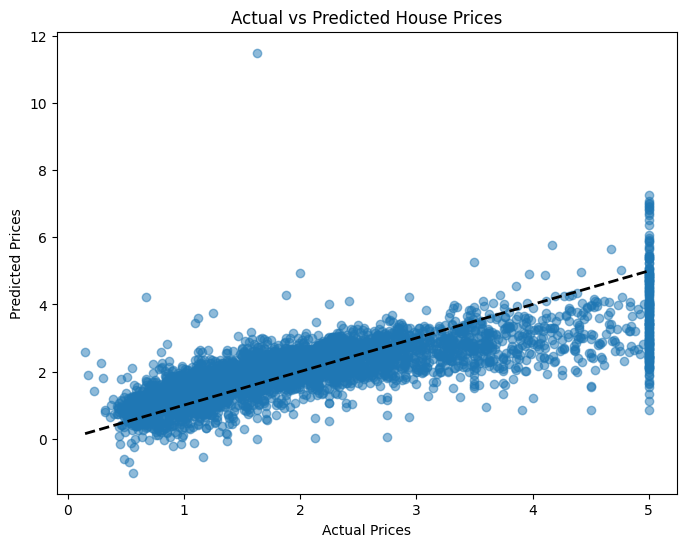

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Real-World Example 2: Tehran House Price Prediction

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [28]:
file_path = '/assets/housePrice.xlsx'
df = pd.read_excel(file_path)

df.head()

Area  Room  Parking  Warehouse  Elevator         Address       Price  \
0    63     1     True       True      True         Shahran  1850000000   
1    60     1     True       True      True         Shahran  1850000000   
2    79     2     True       True      True          Pardis   550000000   
3    95     2     True       True      True   Shahrake Qods   902500000   
4   123     2     True       True      True  Shahrake Gharb  7000000000   

    PriceUSD  
0   61666.67  
1   61666.67  
2   18333.33  
3   30083.33  
4  233333.33

In [29]:
print(df['Area'].describe())
print(df[df['Area'] > 1e6])

count    3.479000e+03
mean     8.744000e+06
std      3.167266e+08
min      3.000000e+01
25%      6.900000e+01
50%      9.000000e+01
75%      1.200000e+02
max      1.616000e+10
Name: Area, dtype: float64
             Area  Room  Parking  Warehouse  Elevator            Address  \
570    3310000000     2     True       True      True        Ostad Moein   
709   16160000000     3     True       True      True           Pasdaran   
1604   8400000000     2     True       True      True         Gheitarieh   
2802   2550000000     2     True       True      True  Central Janatabad   

            Price   PriceUSD  
570    3310000000  110333.33  
709   16160000000  538666.67  
1604   8700000000  290000.00  
2802   2550000000   85000.00  


In [30]:
# Data cleaning - removing outliers based on IQR
Q1_area = df['Area'].quantile(0.25)
Q3_area = df['Area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

Q1_price = df['PriceUSD'].quantile(0.25)
Q3_price = df['PriceUSD'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

df_cleaned = df[(df['Area'] >= lower_bound_area) & (df['Area'] <= upper_bound_area) &
                (df['PriceUSD'] >= lower_bound_price) & (df['PriceUSD'] <= upper_bound_price)]

# Check the cleaned dataset
df_cleaned.describe()


Area         Room         Price       PriceUSD
count  3112.000000  3112.000000  3.112000e+03    3112.000000
mean     90.353470     1.948265  3.393833e+09  113127.752988
std      30.790158     0.638090  2.844133e+09   94804.436318
min      30.000000     0.000000  3.600000e+06     120.000000
25%      66.000000     2.000000  1.250000e+09   41666.670000
50%      86.000000     2.000000  2.450000e+09   81666.670000
75%     109.000000     2.000000  4.500000e+09  150000.000000
max     192.000000     5.000000  1.282500e+10  427500.000000

In [31]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_cleaned['Area'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Area')

plt.subplot(1, 2, 2)
plt.hist(df_cleaned['PriceUSD'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of PriceUSD')

plt.show()

In [32]:
# Function to compute the Root Mean Squared Error (RMSE)
def compute_rms_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to create polynomial features
def polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

# Function to perform polynomial regression
def polynomial_regression(X, y, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    return model


Processing address: Shahran


Processing address: Pardis


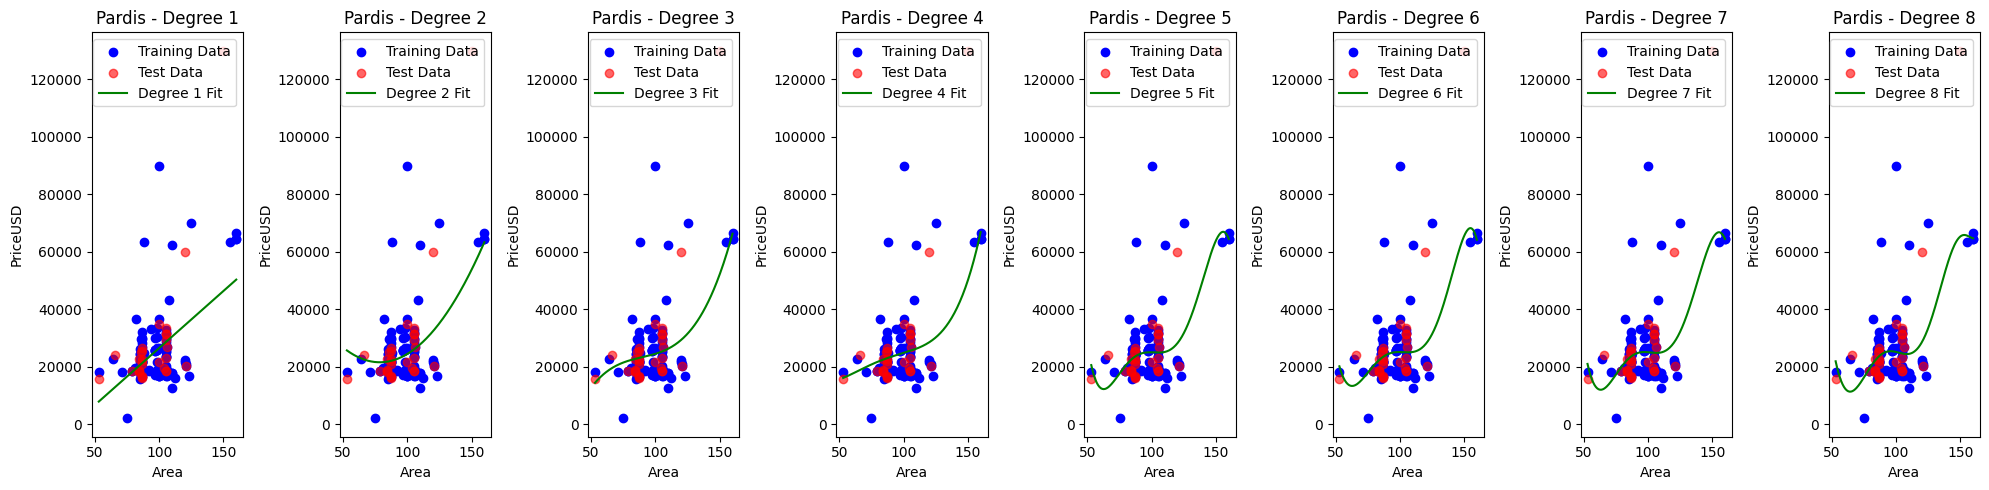

Processing address: Shahrake Qods


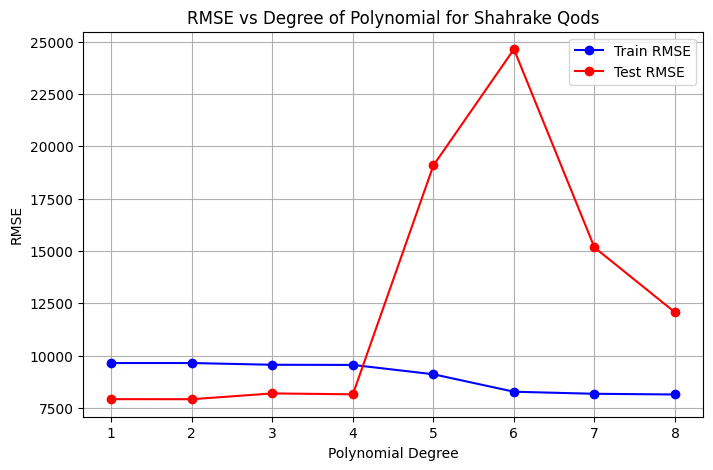

Processing address: Andisheh


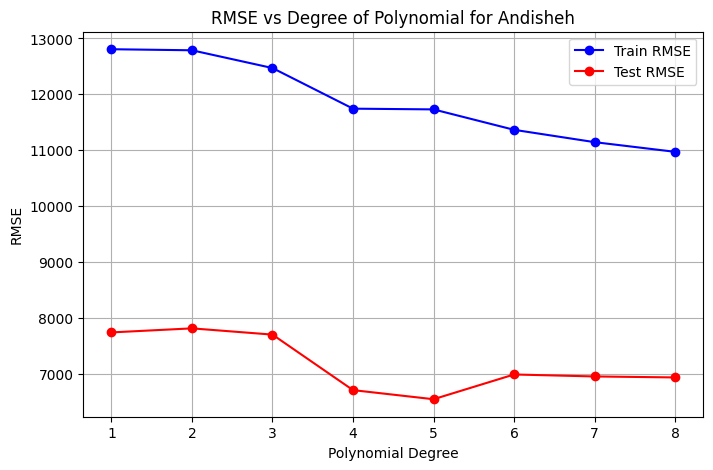

Processing address: West Ferdows Boulevard


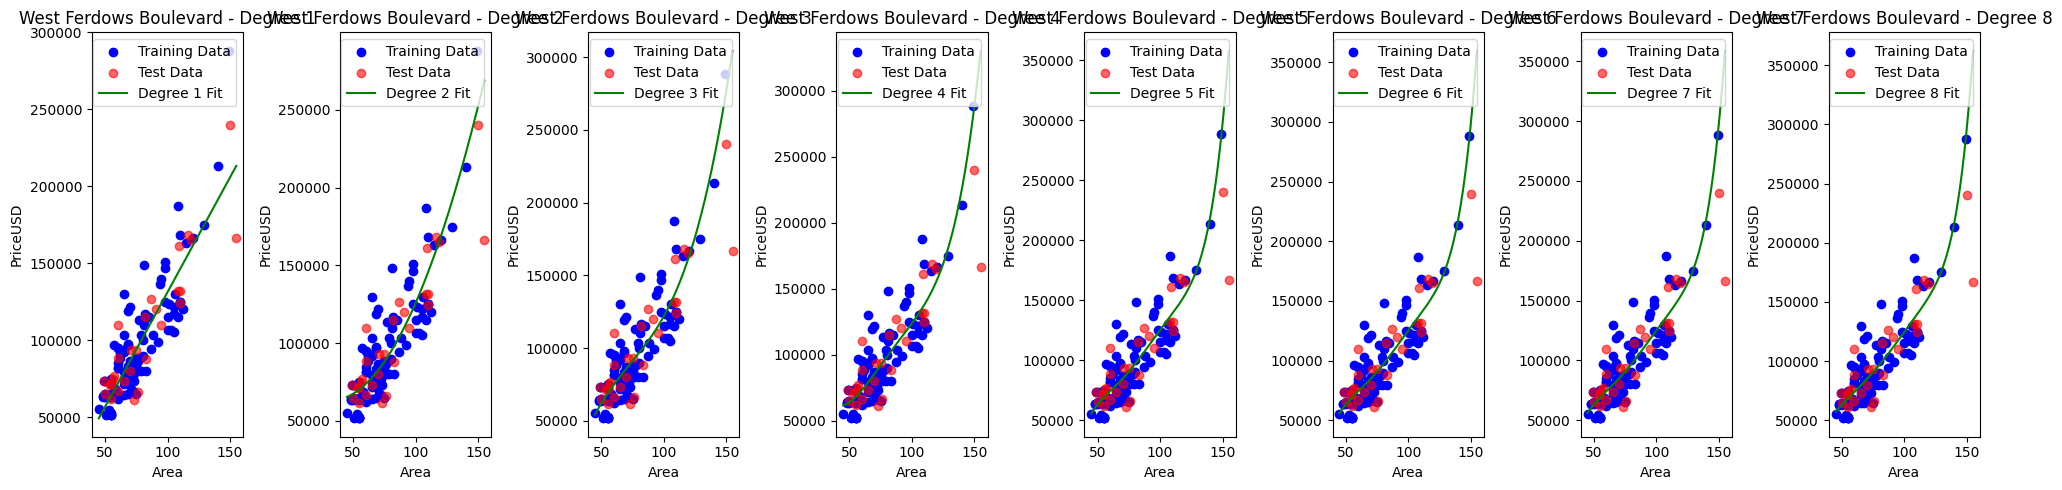

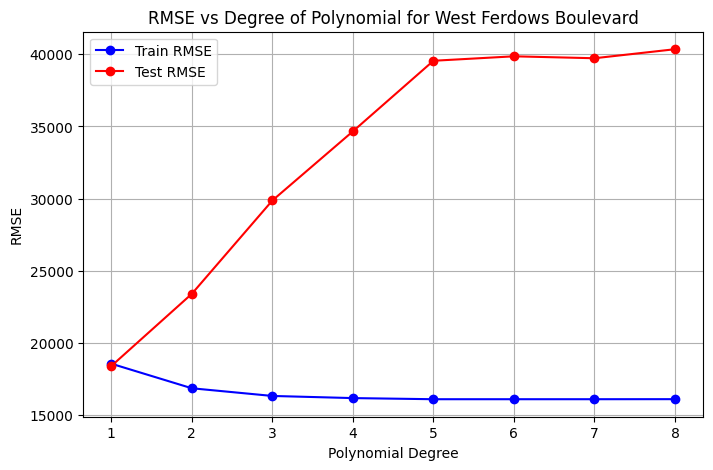

Processing address: Saadat Abad


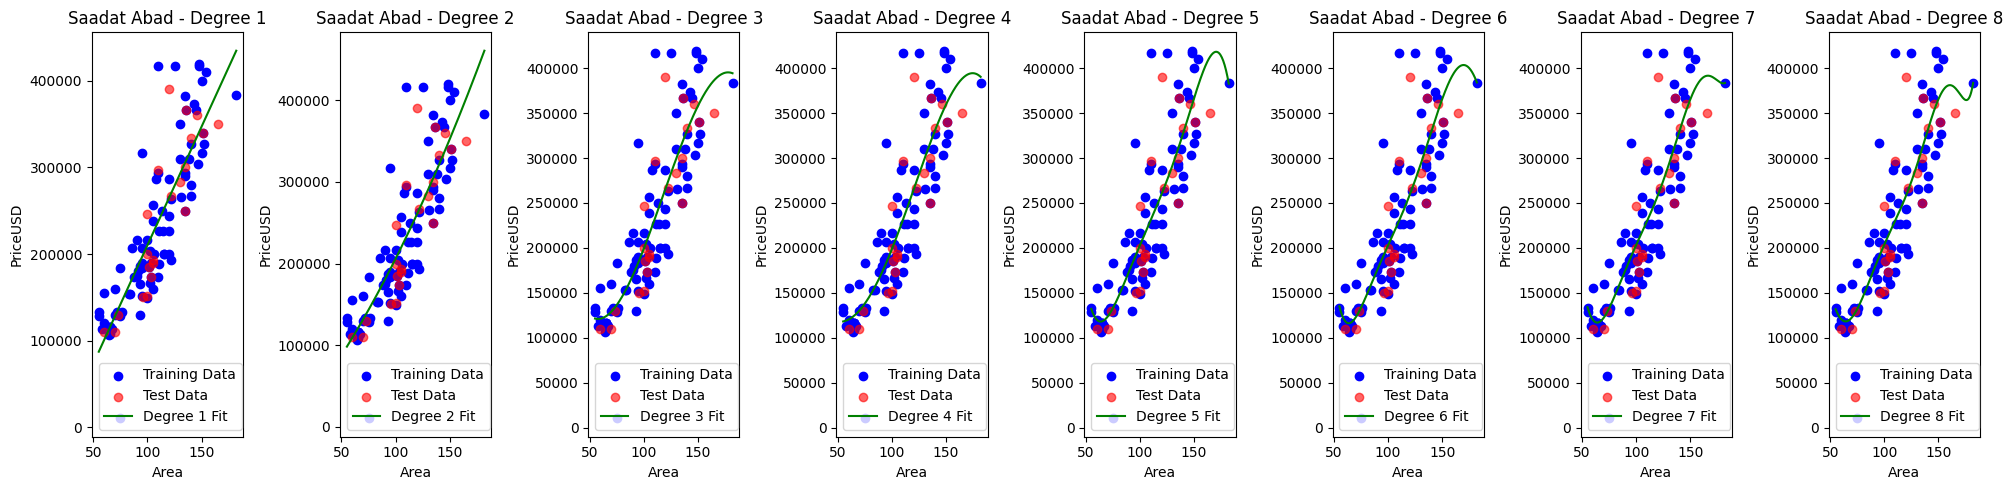

Processing address: Pirouzi


Processing address: Southern Janatabad


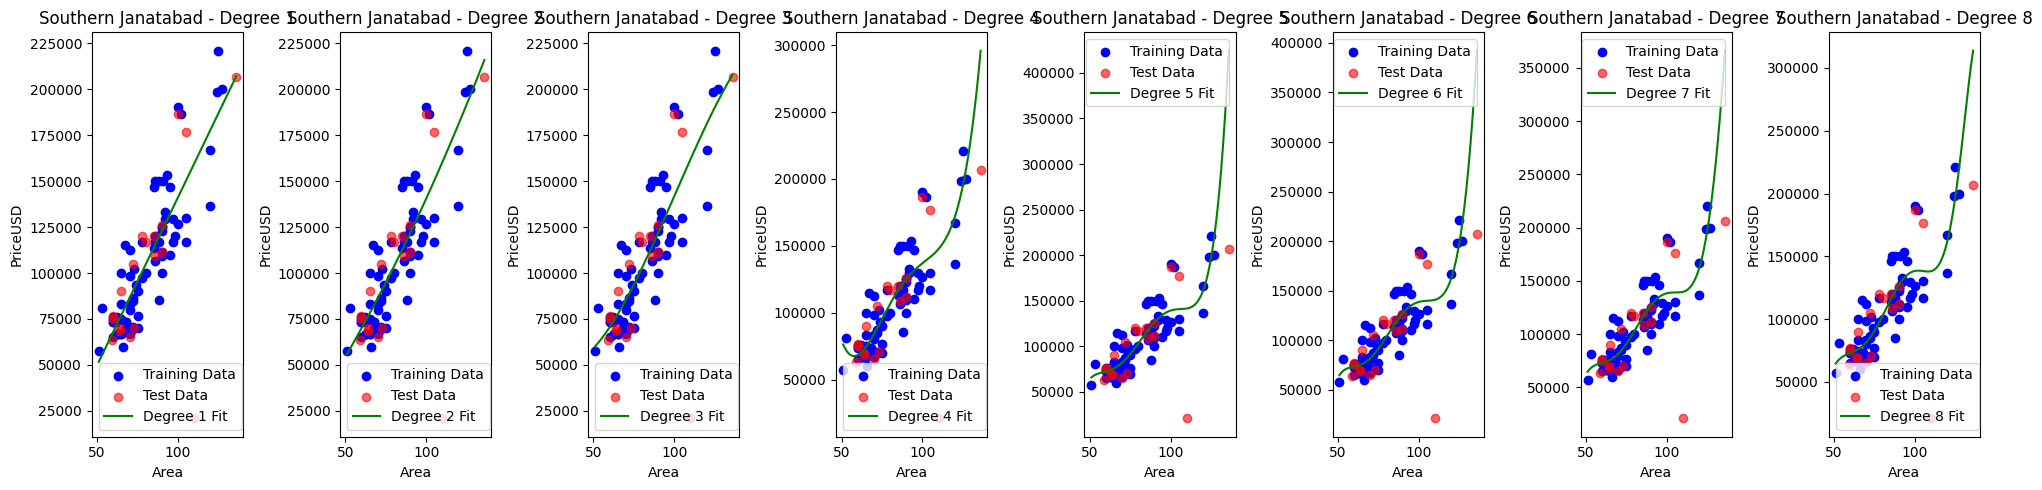

Processing address: Salsabil


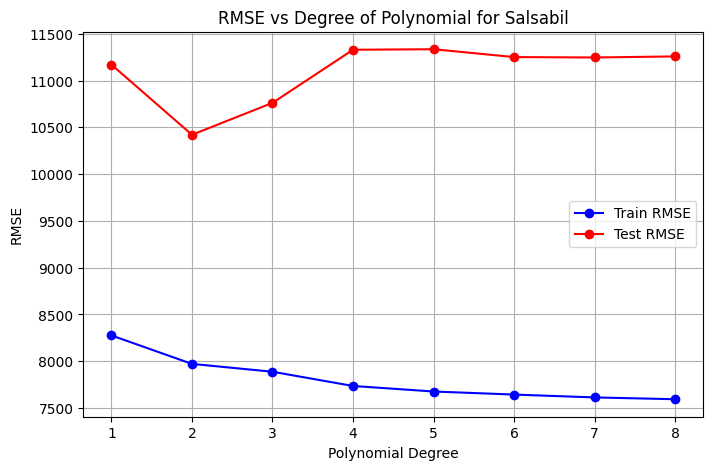

Skipping address nan due to insufficient samples.
Processing address: Ostad Moein


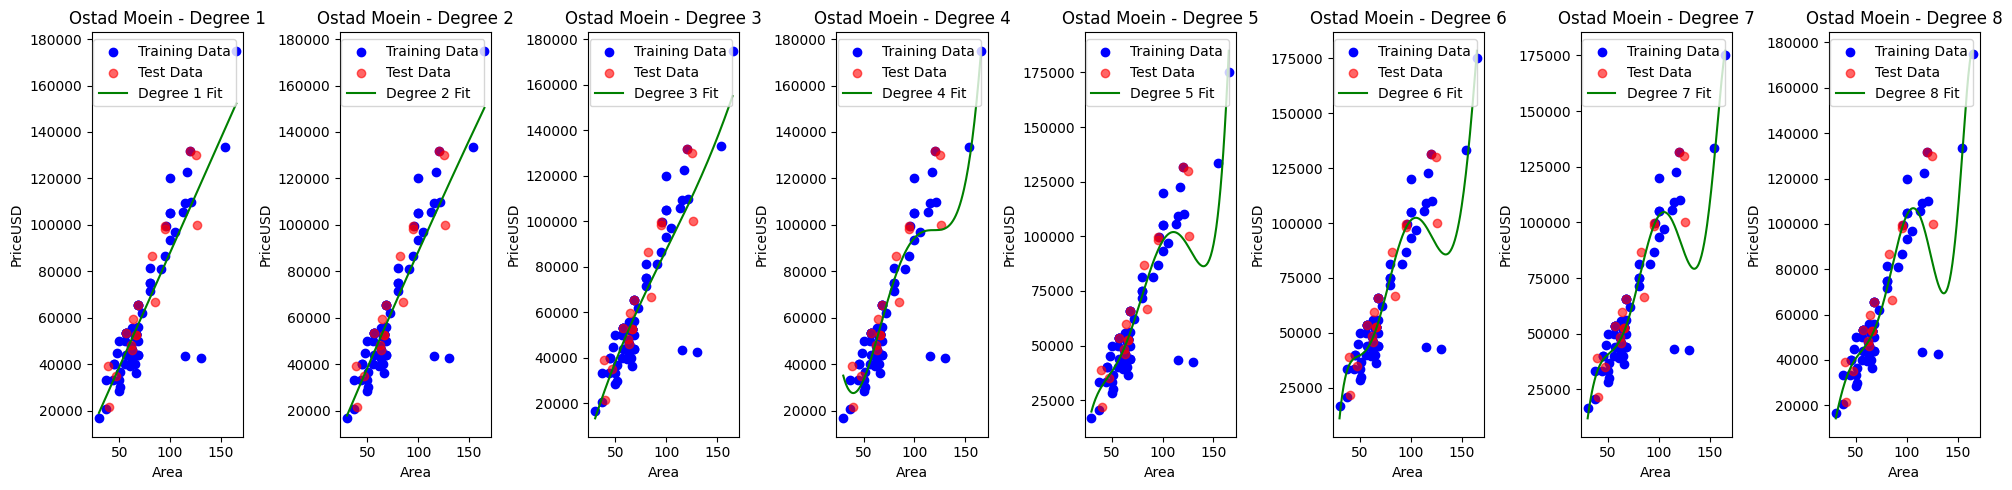

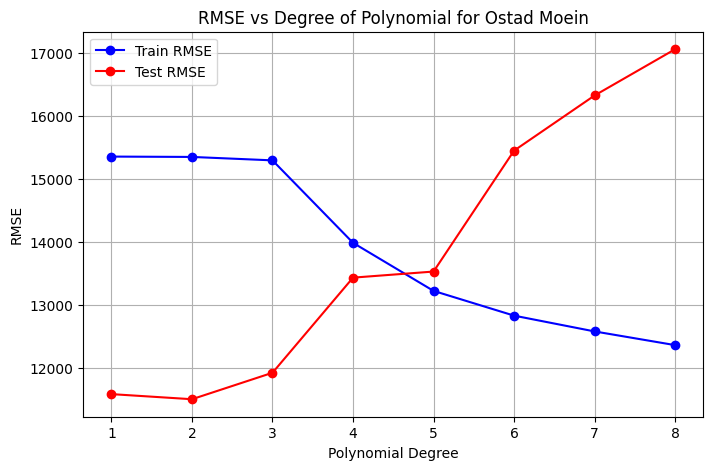

Processing address: Parand


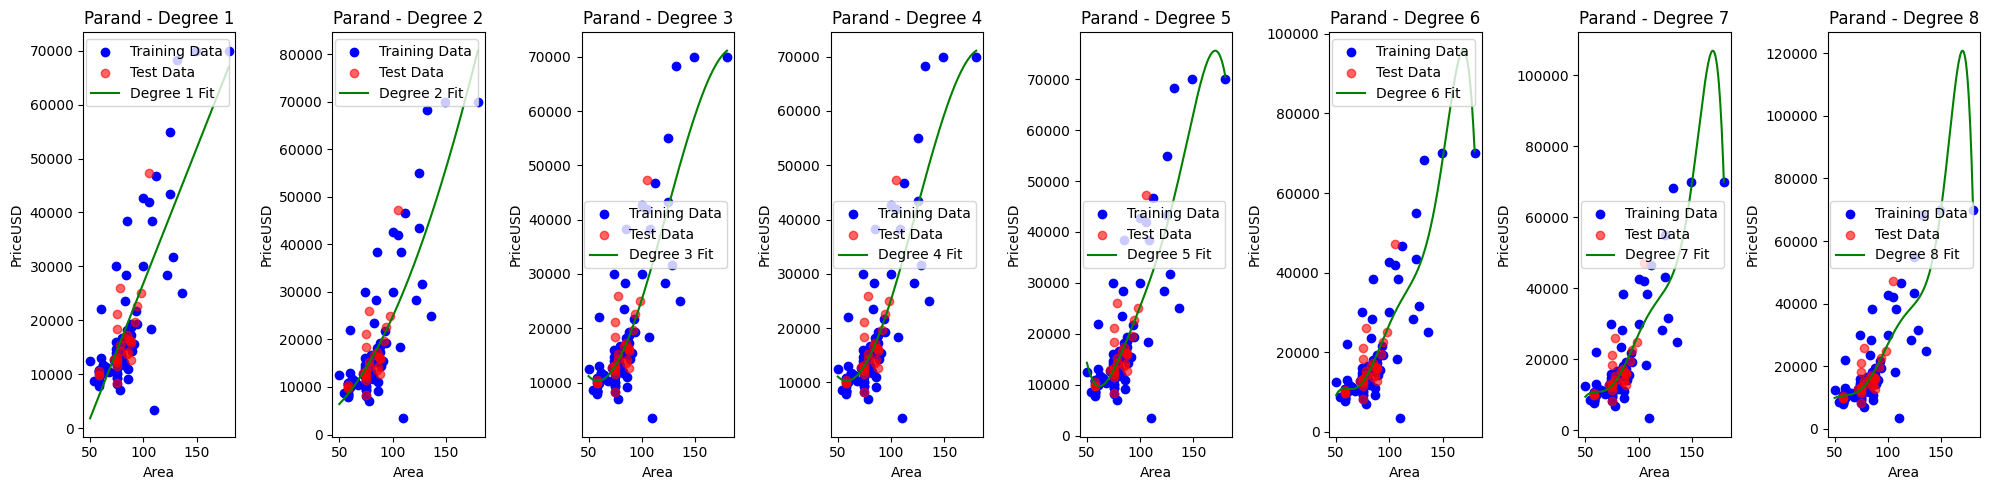

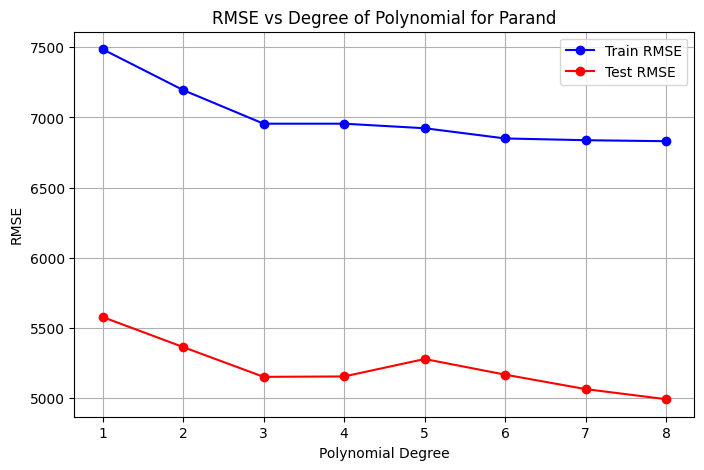

Processing address: Punak


Processing address: Central Janatabad


Processing address: East Ferdows Boulevard


Skipping address Pakdasht KhatunAbad due to insufficient samples.
Skipping address Chahardangeh due to insufficient samples.
Skipping address Baqershahr due to insufficient samples.
Processing address: Jeyhoon


Skipping address Bahar due to insufficient samples.
Processing address: Persian Gulf Martyrs Lake


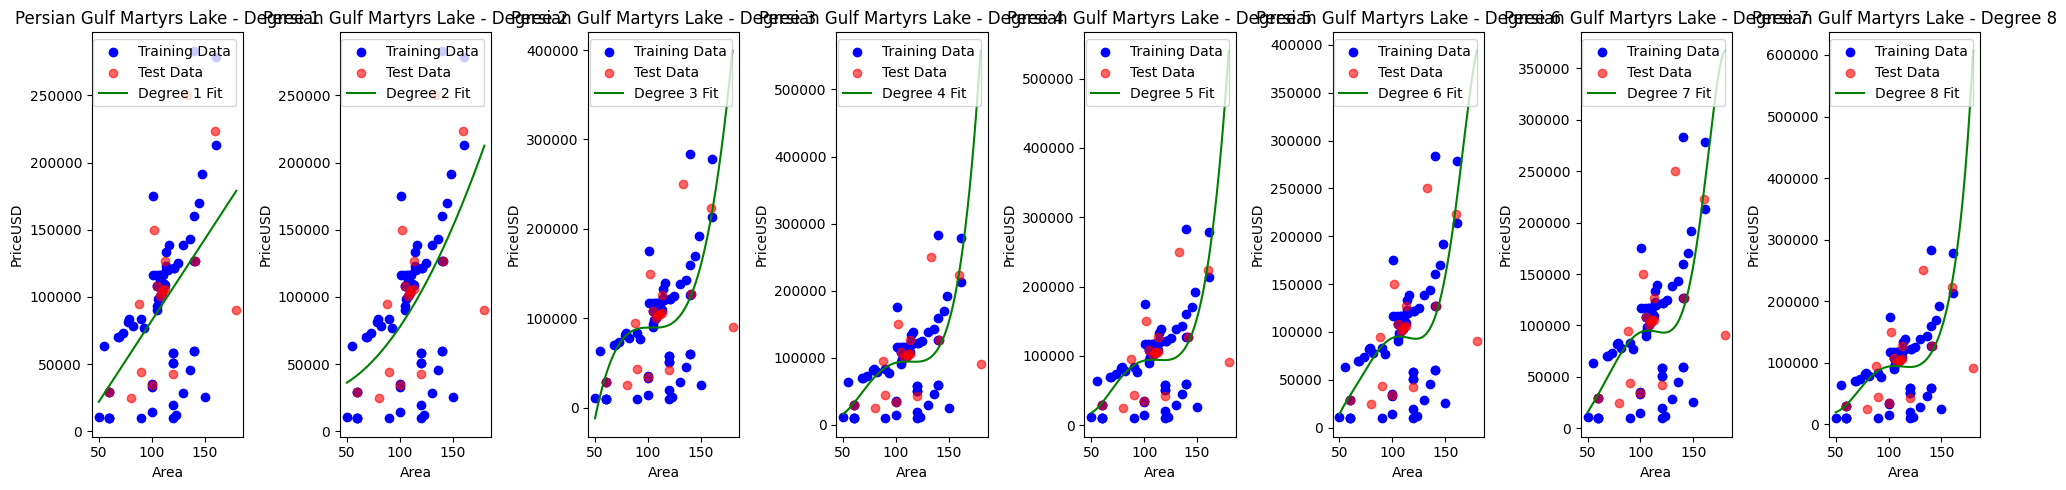

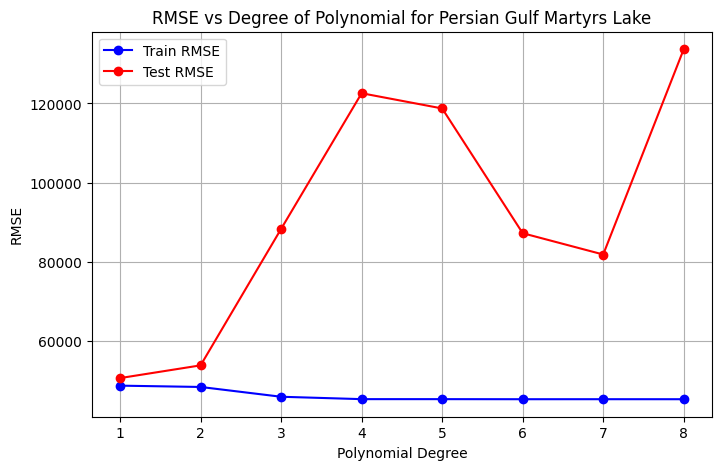

Processing address: Shahr-e-Ziba


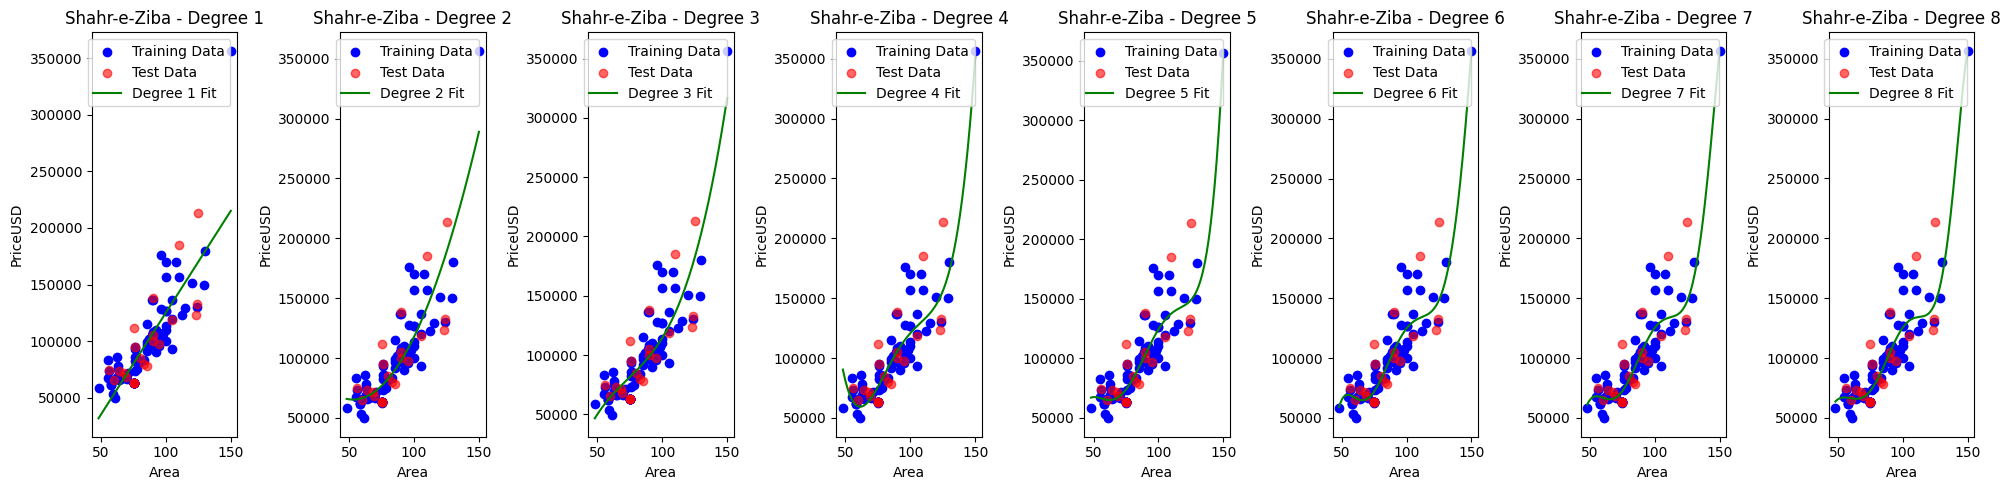

Processing address: Pasdaran


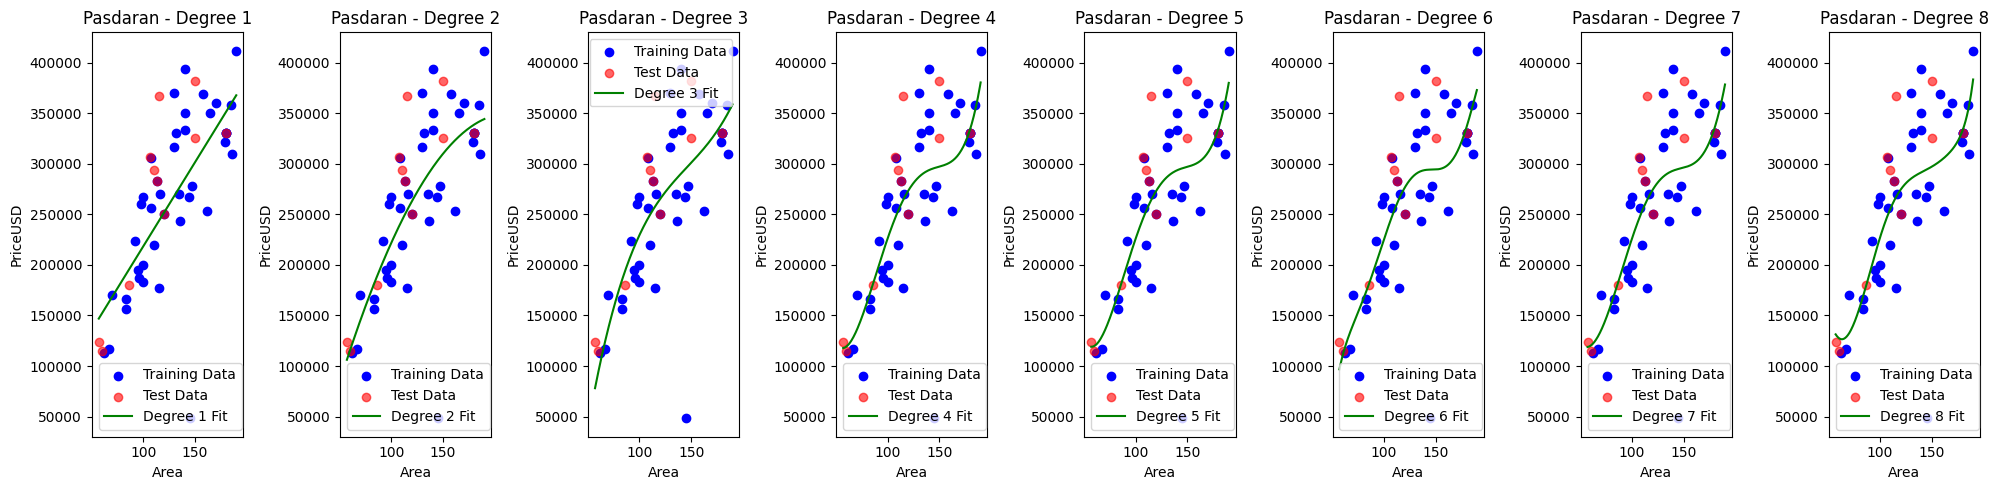

Skipping address Chardivari due to insufficient samples.
Processing address: Gheitarieh


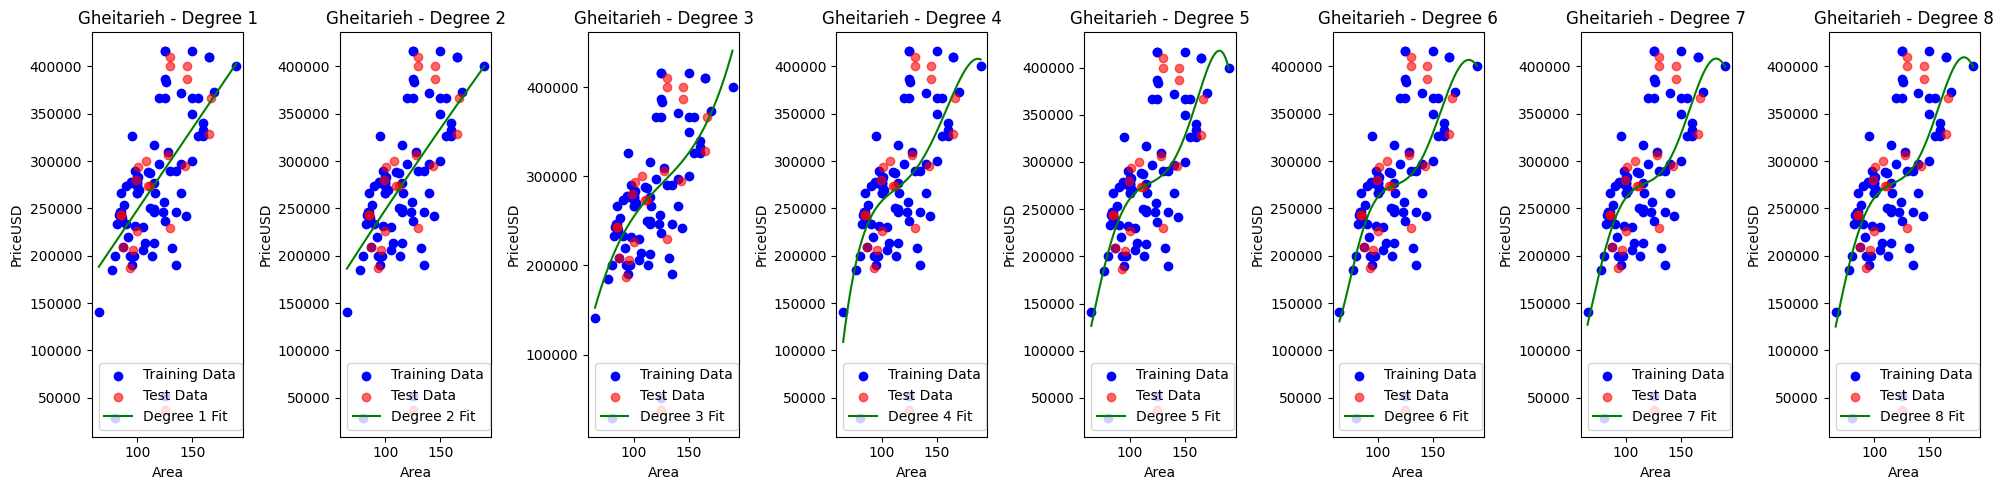

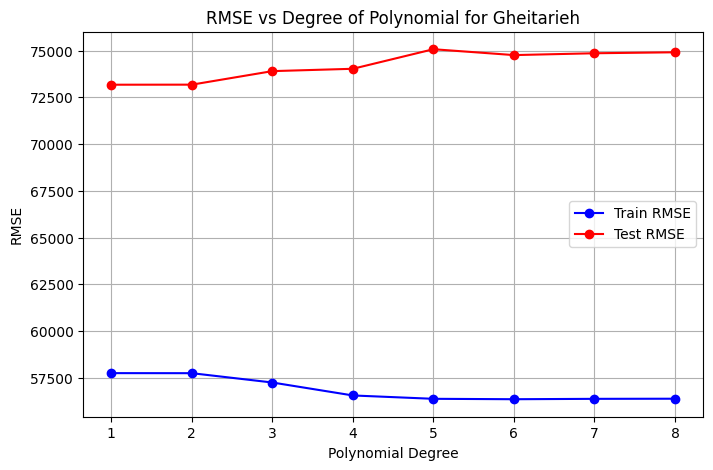

Skipping address Sohanak due to insufficient samples.
Skipping address Zibadasht due to insufficient samples.
Skipping address Chardangeh due to insufficient samples.
Skipping address Villa due to insufficient samples.
Skipping address Azari due to insufficient samples.
Skipping address Shahrake Apadana due to insufficient samples.
Skipping address Darband due to insufficient samples.
Skipping address Eram due to insufficient samples.
Skipping address SabaShahr due to insufficient samples.
Skipping address Shahrake Madaen due to insufficient samples.
Skipping address Salehabad due to insufficient samples.
Skipping address Enghelab due to insufficient samples.
Skipping address Islamshahr Elahieh due to insufficient samples.
Skipping address Ray - Montazeri due to insufficient samples.
Skipping address Firoozkooh Kuhsar due to insufficient samples.
Skipping address Mehrabad due to insufficient samples.
Skipping address Kazemabad due to insufficient samples.
Skipping address Ray - Pilgosh

In [33]:
# Group by 'Address' and perform analysis for each region
addresses = df_cleaned['Address'].unique()

for address in addresses:
    df_address = df_cleaned[df_cleaned['Address'] == address]

    # Skip if not enough data points
    if len(df_address) < 2:
        print(f"Skipping address {address} due to insufficient samples.")
        continue

    X = df_address[['Area']]
    y = df_address['PriceUSD']

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Skip if train or test sets are empty
    if len(X_train) < 20 or len(X_test) < 10:
        # print(f"Skipping address {address} due to train-test split issues.")
        continue
    else:
      print(f"Processing address: {address}")

    # Set polynomial degrees to evaluate
    degrees = [d for d in range(1,9)]

    train_rms_errors = []
    test_rms_errors = []

    for degree in degrees:
        model = polynomial_regression(X_train, y_train, degree)

        X_train_poly = polynomial_features(X_train, degree)
        y_train_pred = model.predict(X_train_poly)

        X_test_poly = polynomial_features(X_test, degree)
        y_test_pred = model.predict(X_test_poly)

        train_rms_error = compute_rms_error(y_train, y_train_pred)
        test_rms_error = compute_rms_error(y_test, y_test_pred)

        train_rms_errors.append(train_rms_error)
        test_rms_errors.append(test_rms_error)

        # print(f"Address: {address}, Degree {degree}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}")

        # Visualize Polynomial Regression for each degree
    fig, axs = plt.subplots(1, len(degrees), figsize=(20, 5))  # Create a grid for subplots

    for idx, degree in enumerate(degrees):
        model = polynomial_regression(X_train, y_train, degree)

        X_train_poly = polynomial_features(X_train, degree)
        y_train_pred = model.predict(X_train_poly)

        X_test_poly = polynomial_features(X_test, degree)
        y_test_pred = model.predict(X_test_poly)

        # Scatter plot of actual data and polynomial fit
        axs[idx].scatter(X_train, y_train, color='blue', label="Training Data")
        axs[idx].scatter(X_test, y_test, color='red', label="Test Data", alpha=0.6)
        X_fit = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
        X_fit_poly = polynomial_features(X_fit, degree)
        y_fit_pred = model.predict(X_fit_poly)
        axs[idx].plot(X_fit, y_fit_pred, label=f"Degree {degree} Fit", color='green')
        axs[idx].set_title(f"{address} - Degree {degree}")
        axs[idx].set_xlabel("Area")
        axs[idx].set_ylabel("PriceUSD")
        axs[idx].legend()

    plt.tight_layout()
    plt.show()


    # Plot Train RMSE and Test RMSE vs Polynomial Degree for each address
    plt.figure(figsize=(8, 5))
    plt.plot(degrees, train_rms_errors, marker='o', label='Train RMSE', color='blue')
    plt.plot(degrees, test_rms_errors, marker='o', label='Test RMSE', color='red')
    plt.title(f"RMSE vs Degree of Polynomial for {address}")
    plt.xlabel("Polynomial Degree")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.show()